In [ ]:
#SVM with non seperable data with soft margin

     pcost       dcost       gap    pres   dres
 0: -2.7291e-01 -7.8823e+00  2e+02  1e+01  4e-13
 1: -4.9291e-02 -6.6868e+00  1e+01  4e-01  3e-13
 2: -5.4765e-03 -6.5301e-01  8e-01  1e-02  6e-14
 3: -2.4641e-07 -7.7935e-03  9e-03  1e-04  7e-15
 4: -1.3743e-04 -4.5742e-04  3e-04  1e-06  4e-16
 5: -1.8859e-04 -2.6029e-04  7e-05  3e-07  2e-16
 6: -2.3110e-04 -2.5058e-04  2e-05  2e-08  2e-16
 7: -2.3716e-04 -2.3880e-04  2e-06  2e-09  2e-16
 8: -2.3798e-04 -2.3801e-04  3e-08  2e-11  3e-16
Optimal solution found.
3 support vectors out of 70 points
17 out of 30 predictions correct
ACCURACY BY FUNCTION 0.666666666667
ACCURACY BY MY FUNCTION 0.566666666667


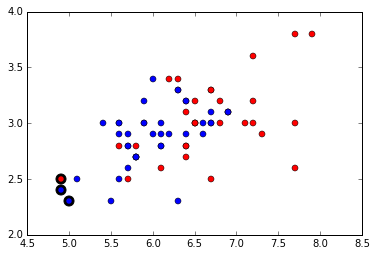

In [3]:
import numpy as np
import math as m
from sklearn import metrics
import sklearn
from sklearn.cross_validation import KFold
import urllib
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import cvxopt as cv
import pandas as pd
from sklearn import svm
import cvxopt.solvers
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
%matplotlib inline

def main():
    iris = load_iris()
    X1 = iris.data
    y1 = iris.target
    X = iris.data[50:150:,0:2] 
    y = iris.target[50:150]
    for i in range(len(y)):
        if y[i]==2:
            y[i]=-1
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    x_train1= pd.DataFrame(columns=(range(2)))
    x_train2= pd.DataFrame(columns=(range(2)))
    for i in range(len(X_train)):
        if y_train[i]==-1:
            x_train1.loc[i]=X_train[i]
        elif y_train[i]==1:
            x_train2.loc[i]=X_train[i]
    x_train1= np.matrix(x_train1)
    x_train2= np.matrix(x_train2)
    
    n_samples, n_features = X_train.shape
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i,j] = np.dot(X[i], X[j])

    m= np.dot(y_train, y_train.T)
    b=np.dot(X_train,X_train.T)
    P= cv.matrix(np.dot(m,b))
#     q=np.full(n_samples, -1)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    tmp1 = np.diag(np.ones(n_samples) * -1)
    tmp2 = np.identity(n_samples)
    G = cv.matrix(np.vstack((tmp1, tmp2)))
    tmp1 = np.zeros(n_samples)
    tmp2 = np.ones(n_samples) * float(0.1)
    h = cv.matrix(np.hstack((tmp1, tmp2)))

#     h = cv.matrix(np.zeros(n_samples))
#     G = cv.matrix(np.diag(np.ones(n_samples) * -1))
    A= cv.matrix(y_train.astype(float),(1,n_samples))
    b=cv.matrix(0.0)
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    L = np.ravel(solution['x'])
    sv = L > 1e-8
    ind = np.arange(len(L))[sv]
    L = L[sv]
    sv_x = X_train[sv]
    sv_y = y_train[sv]
    print "%d support vectors out of %d points" % (len(L), n_samples)
    b = 0
    for n in range(len(L)):
        b += sv_y[n]
#         print a.dtype,sv_y.astype(float).dtype, sv_y.dtype, K[ind[n].astype(int),sv.astype(int)].T.dtype
#         b = b- np.sum(np.dot(L, np.dot(sv_y, K[ind[n].astype(int),sv.astype(int)].T)))
        b -= np.sum(L * sv_y * K[ind[n],sv])
#         b=b-m
    b /= len(L)

    # Weight vector
    
    w = np.zeros(n_features)
    for n in range(len(L)):
        w += L[n] * sv_y[n] * sv_x[n]
    y_pred= np.sign(np.dot(X_test, w) + b)
    correct = np.sum(y_pred == y_test)
    print "%d out of %d predictions correct" % (correct, len(y_pred))
    d=pd.DataFrame(columns=('y_test','y_pred'))
    for i in range(len(y_test)):
        d.loc[i]=(y_test[i],y_pred[i])
#     print d
    clf = svm.SVC()
    clf.fit(X_train, y_train) 
    fun_pred=clf.predict(X_test)
    Fun_Accuracy = metrics.accuracy_score(y_test, fun_pred)
    print "ACCURACY BY FUNCTION", Fun_Accuracy
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    print "ACCURACY BY MY FUNCTION", Accuracy
    plt.plot(x_train1[:,0], x_train1[:,1], "ro")
    plt.plot(x_train2[:,0], x_train2[:,1], "bo")
    plt.scatter(sv_x[:,0], sv_x[:,1], s=100, c="black")
    plt.savefig("non-seperable-soft.png")
    
if __name__ == "__main__":main()